# Styling Plots
This exercise uses the problem presented in the *Plotting Reaction Kinetics* exercise to demonstrate ways to change the **style** in plots. What do you prefer? Express your personality through plots.

Reading in data from a file and plotting the data is a useful way to quickly **evaluate** an experiment. We will imagine that our data is in a file called "data.txt" that is located in the same directory as this notebook. In this example we will again examine concentration vs. time data for a reaction and quickly determine if the reaction is first or second order. But we will now be **getting fancy** with our plot styles.

First we load up the tools. We will need tools from the *MatPlotLib*, *NumPy* and *Pandas* packages.

In this exercise, the emphasis will be on developing **more sophisticated plots** for a basic experiment.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

## The Data

We will **repeat** the idea of plotting reaction kinetic data to determine order. Below is the code that does this.


In [2]:
df = pd.read_csv("S2_DataA.csv")

x_col_name, y_col_name = df.columns.values[0:2]

df["1/conc"] = 1/df[y_col_name]
df["ln conc"] = np.log(df[y_col_name])

print(df)  

   time (min)  conc (mM)    1/conc   ln conc
0        0.50   2.741794  0.364725  1.008612
1        0.75   2.621148  0.381512  0.963612
2        1.00   2.505811  0.399072  0.918612
3        2.00   2.093029  0.477776  0.738612
4        4.00   1.460257  0.684811  0.378612
5        6.00   1.018787  0.981560  0.018612
6        9.00   0.593696  1.684363 -0.521388


## Two Plots in One Figure

The *Plotting Reaction Kinetics*  exercise used two **separate** plots and gave a clear answer. You could have stopped there. But let us learn a little more about what the *MatPlotLib* library can do for us. What if we wanted to present both plots **side by side**? To do this will will create a "**figure**" object with the `matplotlib.pyplot` tools. Then we will add two separate "**axes**" (plots) into the figure.

So we will create a figure and drop the two plots previously presented above into it. Take note of the code below and try to see how this was accomplished.

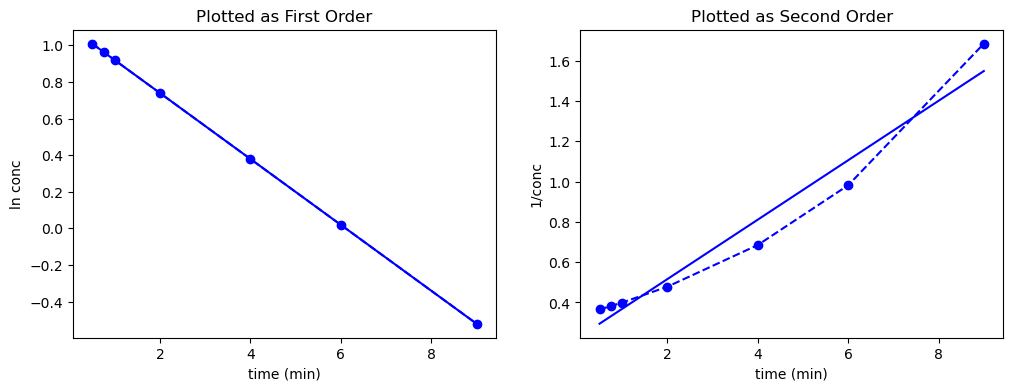

In [3]:
plt.figure(figsize=(12, 4))                  # create a figure

plt.subplot(121)                             # split it into a 1X2 grid and address the first section

x, y = df[x_col_name], df["ln conc"]         # select x and y from the dataframe
plt.plot(x, y, "bo--")                       # plot the data 

fit = stats.linregress(x,y)                  # perform a line fit
calc_y = fit.intercept + fit.slope * x       # calculate the y values for the line fit 
plt.plot(x, calc_y, "b-")                    # plot the line fit as a line only.

plt.title("Plotted as First Order")          # Title of the plot  
plt.xlabel(x_col_name)                       # x-axis label  
plt.ylabel("ln conc")                        # y-axis label  

plt.subplot(122)                             # address the second section of the 1X2 grid
x, y = df[x_col_name], df["1/conc"]          # select x and y from the dataframe
plt.plot(x, y,"bo--")                        # plot the data 

fit = stats.linregress(x,y)                  # perform a line fit
calc_y = fit.intercept + fit.slope * x       # calculate the y values for the line fit 
plt.plot(x, calc_y, "b-")                    # plot the line fit as a line only.

plt.title("Plotted as Second Order")         # Title of the plot         
plt.xlabel(x_col_name)                       # x-axis label   
plt.ylabel("1/conc")                         # y-axis label  

plt.show()                                   # each of the commands above modified the plt object. Now show it.

## More Sophisticated Plotting

There are **many settings** for formatiing your plot and many ways control the *MatPlotLib* system. Using the *PyPlot* sublibrary gives us a function-oriented system. Observe above how everything was a function (calling `Do_That(with_this, and_this)`) or assigments (`Do_That.setting = whatever`). 

*Python* is an **object-oriented** language and we have already seen how we can create an **object** with a function call and than have the object manipulate itself using "**methods**". Methods are functions built into the object that act on that object. For example, we can create a wheel object using `circle = wheel()`. We called the wheel function that was designed to create objects that represent the wheel.  We named our wheel object "circle".  Now we can call any wheel object method within "circle" and **change it**.  For example, wheel objects contain the method `turn()`. If we state `circle.turn(90)` we might be turning the wheel object named "circle" by 90 degrees. It's exactly the same as `circle = wheel.turn(circle, 90)`. 

Consider the following code and observe how we create an object that is a **figure** and then created two **axes** objects within it (these are the plots). We can manipulate each object by calling the methods that act upon them. The result will be the same as in the above code, but more options for styling are available this way.

In the end you will be best served by keeping things simple and using the same plkotting settings again and again. Choose your style and stick with it.

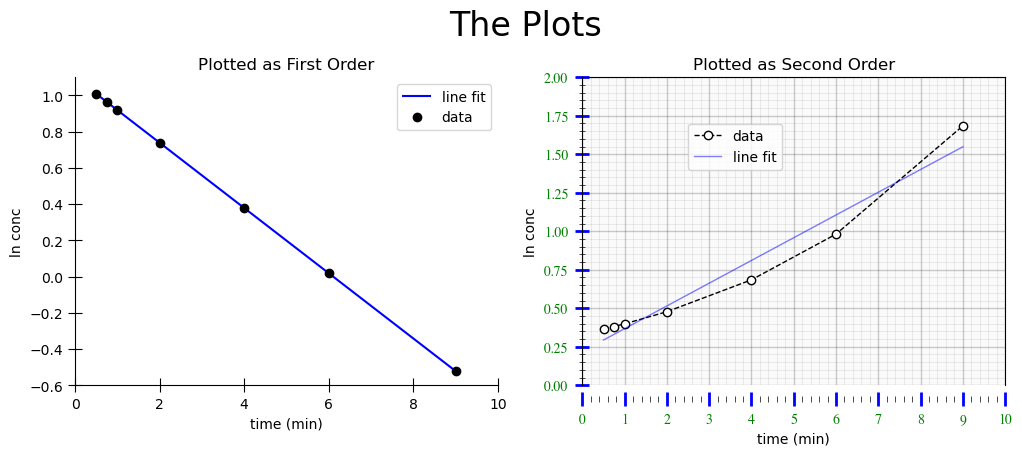

In [4]:
# -------------------
# Create plot objects. the figure object and any axes that it contains.
# -------------------

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,4))    # create a fig object with a list of axes objects 

fig.suptitle("The Plots", fontsize="24", fontweight="light", y=1.05)                 

# -------------------
# The first plot is basic with a few popular formating options used.
# -------------------
x, y = df[x_col_name], df["ln conc"]             # get the desired data from the dataframe
linefit = stats.linregress(x,y)                  # perform a line fit
calc_y = linefit.intercept + linefit.slope * x   # calculate the y values for the line fit 

ax[0].plot(x, calc_y, "b-", label = "line fit")  # plot the calculated line
ax[0].plot(x,y, "ko", label = "data")            # plot the data from the dataframe

ax[0].set(title="Plotted as First Order",        # Title of the plot
          ylabel="ln conc",                      # y-axis label
          xlabel=x_col_name,                     # x-axis label
          xlim=[0,10],                           # x-axis limits
          ylim=[-.6,1.1])                        # y-axis limits
ax[0].tick_params(axis='both',                   # Which axis is addressed {x, y, both}
                  direction='inout',             # Ticks direction. {in, out, inout}
                  length=10,                     # Tick length in points
                  color="k")                     # Tick color
ax[0].spines[['top', 'right']].set_visible(False)
ax[0].legend(loc='best')


# -------------------
# This second plot is fancy. Note all the options that are used.
# There are many, many more options available. Read the matplotlib documentation for more.
# -------------------
x, y = df[x_col_name], df["1/conc"]              # get the desired data from the dataframe
linefit = stats.linregress(x,y)                  # perform a line fit
calc_y = linefit.intercept + linefit.slope * x   # calculate the y values for the line fit 

ax[1].plot(x,y,                                  # plot data with these style parameters
           color="k",
           linestyle="--",
           marker="o",
           markerfacecolor="w",
           markeredgecolor="k",
           markeredgewidth=1.0,
           linewidth=1,
           label = "data"
          )
ax[1].plot(x, calc_y,                            # plot line fit with these style parameters
           color="b",
           linestyle="-",
           linewidth=1,
           alpha=0.5, 
           label = "line fit"
          ) 
ax[1].set(xlim=[0,10],                           # set the limits of the axes
          ylim=[0,2]
         )
ax[1].set(title="Plotted as Second Order",       # set title and axis labels
          ylabel="ln conc",
          xlabel=x_col_name
         )
ax[1].set_facecolor("0.98")                      # set background color of plot area

ax[1].grid(which='major',                        
           visible="True", 
           color='k', 
           axis='both', 
           linestyle='-', 
           linewidth=1,
           alpha=0.2

          )
ax[1].grid(which='minor', 
           visible="True", 
           color='k', 
           axis='both', 
           linestyle='-', 
           linewidth=0.5, 
           alpha=0.1
          )
ax[1].xaxis.set(ticks=range(0,11))
ax[1].tick_params(axis='both',          # Which axis is addressed {x, y, both}
                  which="major",
                  direction='inout',    # Puts ticks inside the axes, outside the axes, or both. {in, out, inout}
                  length=10,            # Tick length in points
                  color="blue",         # Tick color
                  pad=5,                # Distance in points between tick and label.
                  width = 2,            # Tick width in points.
                  labelsize="9",        # Tick label font size in points or as a string (e.g., 'large').
                  labelcolor="green",   # Tick label color
                  labelrotation=0,      # Tick label rotation (degrees)
                 )
ax[1].minorticks_on()
ax[1].tick_params(axis='both',          # Which axis is addressed {x, y, both}
                  which="minor",
                  direction='inout',    # Puts ticks inside the axes, outside the axes, or both. {in, out, inout}
                  length=5,             # Tick length in points
                  color="k",            # Tick color and label color.
                  width = 0.5,          # Tick width in points.
                 )

ax[1].legend(loc=(0.25,0.7))             # legend of plot. position = "best" of x,y from lower left.


ax[1].spines[['top','right','left']].set_visible(True)
ax[1].spines['bottom'].set_visible(False)
ax[1].spines['left'].set_position(('outward',0))
ax[1].spines['bottom'].set_position(('outward',10))
ax[1].spines['bottom'].set_color("k")
#fig.draw_without_rendering()
 
for tick in ax[1].get_xticklabels(which="both"):       # ('minor', 'major', 'both')
    tick.set_fontname("Times")
    tick.set_fontsize(10)
for tick in ax[1].get_yticklabels(which="both"):       # ('minor', 'major', 'both')
    tick.set_fontname("Times")
    tick.set_fontsize(10)

#fig.savefig("my-first-figure.pdf")
plt.show()

## Stylesheets
Rather than set many different parameters as we style a plot, we could use a **stylesheet** that contains all the settings. I took the standard stylesheet and changed a few setting to obtain the plot below. The stylesheet file is available on the **moodle** site and is reproduced in the resource section at the end of this chapter.

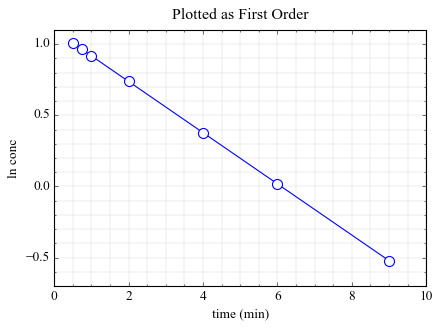

In [5]:
x, y = df[x_col_name], df["ln conc"]

plt.style.use("S2_classic2.mplstyle")        # This is a stylesheet that I created.

fig, ax = plt.subplots(nrows=1 ,ncols=1, figsize=(6,4))  # create objects for the figure and the plot
ax.plot(x,y,"o-")

ax.set(title="Plotted as First Order",       # Title of the plot
          ylabel="ln conc",                  # y-axis label
          xlabel=x_col_name,                 # x-axis label
          xlim=[0,10],                       # x-axis limits
          ylim=[-0.7,1.1])                   # y-axis limits

#fig.savefig("my-first-figure2.pdf")
plt.show()

## Resources
The **data files** can be obtained from the resources section of the course **moodle** site. The contents of the files are displayed below so that you can make them yourself if you are unable to access moodle.

**S2_DataA.csv**
```
time (min),conc (mM)
0.5,2.741793556
0.75,2.621147735
1,2.505810634
2,2.093028978
4,1.460256768
6,1.018786577
9,0.593696097
```

**S2_classic2.mplstyle**

```
### Classic matplotlib plotting style as of v1.5
### Altered to fit desired style by Barry Linkletter


### LINES
# See https://matplotlib.org/api/artist_api.html#module-matplotlib.lines for more
# information on line properties.
lines.linewidth   : 1.0     # line width in points
lines.linestyle   : -       # solid line
lines.color       : b       # has no affect on plot(); see axes.prop_cycle
lines.marker      : None    # the default marker
lines.markerfacecolor  : w    # the default markerfacecolor
lines.markeredgecolor  : b    # the default markeredgecolor
lines.markeredgewidth  : 1     # the line width around the marker symbol
lines.markersize  : 9            # markersize, in points
lines.dash_joinstyle : round        # miter|round|bevel
lines.dash_capstyle : butt          # butt|round|projecting
lines.solid_joinstyle : round       # miter|round|bevel
lines.solid_capstyle : projecting   # butt|round|projecting
lines.antialiased : True         # render lines in antialiased (no jaggies)
lines.dashed_pattern : 6, 6
lines.dashdot_pattern : 3, 5, 1, 5
lines.dotted_pattern : 1, 3
lines.scale_dashes: False

### Marker props
markers.fillstyle: full

### PATCHES
# Patches are graphical objects that fill 2D space, like polygons or
# circles.  See
# https://matplotlib.org/api/artist_api.html#module-matplotlib.patches
# information on patch properties
patch.linewidth        : 1.0     # edge width in points
patch.facecolor        : b
patch.force_edgecolor  : True
patch.edgecolor        : k
patch.antialiased      : True    # render patches in antialiased (no jaggies)

hatch.color            : k
hatch.linewidth        : 1.0

hist.bins              : 10

### FONT
#
# The font.size property is the default font size for text, given in pts.
# 12pt is the standard value.
#
font.family         : serif
font.style          : normal
font.variant        : normal
font.weight         : normal
font.stretch        : normal

font.size           : 12.0
font.serif     : Times New Roman, Times, DejaVu Serif, New Century Schoolbook, Century Schoolbook L, Utopia, ITC Bookman, Bookman, Nimbus Roman No9 L, Palatino, Charter, serif
font.sans-serif: Helvetica, Arial, DejaVu Sans, Lucida Grande, Verdana, Geneva, Lucid, Avant Garde, sans-serif
font.cursive   : Apple Chancery, Textile, Zapf Chancery, Sand, Script MT, Felipa, cursive
font.fantasy   : Comic Sans MS, Chicago, Charcoal, ImpactWestern, Humor Sans, fantasy
font.monospace : Courier New, Courier, DejaVu Sans Mono, Andale Mono, Nimbus Mono L,  Fixed, Terminal, monospace

### TEXT
# text properties used by text.Text.  See
# https://matplotlib.org/api/artist_api.html#module-matplotlib.text for more
# information on text properties

text.color          : k

### LaTeX customizations. See http://www.scipy.org/Wiki/Cookbook/Matplotlib/UsingTex
text.usetex         : False 
text.latex.preamble :  
text.hinting : auto   
text.hinting_factor : 8 
text.antialiased : True 

# The following settings allow you to select the fonts in math mode.
mathtext.cal : cursive
mathtext.rm  : serif
mathtext.tt  : monospace
mathtext.it  : serif:italic
mathtext.bf  : serif:bold
mathtext.sf  : sans\-serif
mathtext.fontset : cm # Should be 'cm' (Computer Modern), 'stix', stixsans' or 'custom'
mathtext.fallback: cm  # Select fallback font from ['cm' (Computer Modern), 'stix', 'stixsans'] 
mathtext.default : it # The default font to use for math.

### AXES
# default face and edge color, default tick sizes,
# default fontsizes for ticklabels, and so on.  See
# https://matplotlib.org/api/axes_api.html#module-matplotlib.axes
axes.facecolor      : 1.0       # axes background color
axes.edgecolor      : k       # axes edge color
axes.linewidth      : 1.0     # edge linewidth
axes.grid           : True   # display grid or not
axes.grid.which     : both
axes.grid.axis      : both
axes.titlesize      : large   # fontsize of the axes title
axes.titley         : 1.0     # at the top, no autopositioning.
axes.titlepad       : 10.0     # pad between axes and title in points
axes.titleweight    : medium  # font weight for axes title
axes.labelsize      : medium  # fontsize of the x any y labels
axes.labelpad       : 5.0     # space between label and axis
axes.labelweight    : normal  # weight of the x and y labels
axes.labelcolor     : k
axes.axisbelow      : True   # whether axis gridlines and ticks are below the axes elements (lines, text, etc)

axes.formatter.limits : -7, 7 
axes.formatter.use_locale : False 
axes.formatter.use_mathtext : False 
axes.formatter.useoffset      : True    
axes.formatter.offset_threshold : 2      
axes.unicode_minus  : True    
axes.prop_cycle    : cycler('color', 'bgrcmyk')
axes.autolimit_mode : round_numbers
axes.xmargin        : 0  # x margin.  See `axes.Axes.margins`
axes.ymargin        : 0  # y margin See `axes.Axes.margins`
axes.spines.bottom  : True
axes.spines.left    : True
axes.spines.right   : True
axes.spines.top     : True
polaraxes.grid      : True    # display grid on polar axes
axes3d.grid         : True    # display grid on 3d axes

date.autoformatter.year   : %Y
date.autoformatter.month  : %b %Y
date.autoformatter.day    : %b %d %Y
date.autoformatter.hour   : %H:%M:%S
date.autoformatter.minute : %H:%M:%S.%f
date.autoformatter.second : %H:%M:%S.%f
date.autoformatter.microsecond : %H:%M:%S.%f
date.converter:                  auto  # 'auto', 'concise'

### TICKS
# see https://matplotlib.org/api/axis_api.html#matplotlib.axis.Tick

xtick.top            : True   # draw ticks on the top side
xtick.bottom         : True   # draw ticks on the bottom side
xtick.major.size     : 4      # major tick size in points
xtick.minor.size     : 2      # minor tick size in points
xtick.minor.visible  : True
xtick.major.width    : 0.5    # major tick width in points
xtick.minor.width    : 0.5    # minor tick width in points
xtick.major.pad      : 4      # distance to major tick label in points
xtick.minor.pad      : 4      # distance to the minor tick label in points
xtick.color          : k      # color of the tick labels
xtick.labelsize      : medium # fontsize of the tick labels
xtick.direction      : in     # direction: in, out, or inout
xtick.major.top      : True   # draw x axis top major ticks
xtick.major.bottom   : True   # draw x axis bottom major ticks
xtick.minor.top      : True   # draw x axis top minor ticks
xtick.minor.bottom   : True   # draw x axis bottom minor ticks
xtick.alignment : center

ytick.left           : True   # draw ticks on the left side
ytick.right          : True   # draw ticks on the right side
ytick.major.size     : 4      # major tick size in points
ytick.minor.size     : 2      # minor tick size in points
ytick.minor.visible  : True
ytick.major.width    : 0.5    # major tick width in points
ytick.minor.width    : 0.5    # minor tick width in points
ytick.major.pad      : 4      # distance to major tick label in points
ytick.minor.pad      : 4      # distance to the minor tick label in points
ytick.color          : k      # color of the tick labels
ytick.labelsize      : medium # fontsize of the tick labels
ytick.direction      : in     # direction: in, out, or inout
ytick.major.left     : True   # draw y axis left major ticks
ytick.major.right    : True   # draw y axis right major ticks
ytick.minor.left     : True   # draw y axis left minor ticks
ytick.minor.right    : True   # draw y axis right minor ticks
ytick.alignment      : center

### GRIDS
grid.color       :   k       # grid color
grid.linestyle   :   -       # line
grid.linewidth   :   0.3     # in points
grid.alpha       :   0.2     # transparency, between 0.0 and 1.0

### Legend
legend.fancybox      : False  # if True, use a rounded box for the
                              # legend, else a rectangle
legend.loc           : upper right
legend.numpoints     : 2      # the number of points in the legend line
legend.fontsize      : large
legend.borderpad     : 0.4    # border whitespace in fontsize units
legend.markerscale   : 1.0    # the relative size of legend markers vs. original
# the following dimensions are in axes coords
legend.labelspacing  : 0.5    # the vertical space between the legend entries in fraction of fontsize
legend.handlelength  : 2.     # the length of the legend lines in fraction of fontsize
legend.handleheight  : 0.7     # the height of the legend handle in fraction of fontsize
legend.handletextpad : 0.8    # the space between the legend line and legend text in fraction of fontsize
legend.borderaxespad : 0.5   # the border between the axes and legend edge in fraction of fontsize
legend.columnspacing : 2.    # the border between the axes and legend edge in fraction of fontsize
legend.shadow        : False
legend.frameon       : True   # whether or not to draw a frame around legend
legend.framealpha    : None    # opacity of legend frame
legend.scatterpoints : 3 # number of scatter points
legend.facecolor     : inherit   # legend background color (when 'inherit' uses axes.facecolor)
legend.edgecolor     : inherit   # legend edge color (when 'inherit' uses axes.edgecolor)



### FIGURE
# See https://matplotlib.org/api/figure_api.html#matplotlib.figure.Figure
figure.titlesize : medium     # size of the figure title
figure.titleweight : normal   # weight of the figure title
figure.figsize   : 8, 6    # figure size in inches
figure.dpi       : 80      # figure dots per inch
figure.facecolor : 1.0    # figure facecolor; 0.75 is scalar gray
figure.edgecolor : w       # figure edgecolor
figure.autolayout : False  # When True, automatically adjust subplot
                           # parameters to make the plot fit the figure
figure.frameon : True

# The figure subplot parameters.  All dimensions are a fraction of the
# figure width or height
figure.subplot.left    : 0.125  # the left side of the subplots of the figure
figure.subplot.right   : 0.9    # the right side of the subplots of the figure
figure.subplot.bottom  : 0.1    # the bottom of the subplots of the figure
figure.subplot.top     : 0.9    # the top of the subplots of the figure
figure.subplot.wspace  : 0.2    # the amount of width reserved for space between subplots,
                                # expressed as a fraction of the average axis width
figure.subplot.hspace  : 0.2    # the amount of height reserved for space between subplots,
                                # expressed as a fraction of the average axis height

### IMAGES
image.aspect : equal             # equal | auto | a number
image.interpolation  : bilinear  # see help(imshow) for options
image.cmap   : jet               # gray | jet etc...
image.lut    : 256               # the size of the colormap lookup table
image.origin : upper             # lower | upper
image.resample  : False
image.composite_image : True

### CONTOUR PLOTS
contour.negative_linestyle :  dashed # dashed | solid
contour.corner_mask : True

# errorbar props
errorbar.capsize: 3

# scatter props
scatter.marker: o

### Boxplots
boxplot.bootstrap: None
boxplot.boxprops.color: b
boxplot.boxprops.linestyle: -
boxplot.boxprops.linewidth: 1.0
boxplot.capprops.color: k
boxplot.capprops.linestyle: -
boxplot.capprops.linewidth: 1.0
boxplot.flierprops.color: b
boxplot.flierprops.linestyle: none
boxplot.flierprops.linewidth: 1.0
boxplot.flierprops.marker: +
boxplot.flierprops.markeredgecolor: k
boxplot.flierprops.markerfacecolor: auto
boxplot.flierprops.markersize: 6.0
boxplot.meanline: False
boxplot.meanprops.color: r
boxplot.meanprops.linestyle: -
boxplot.meanprops.linewidth: 1.0
boxplot.medianprops.color: r
boxplot.meanprops.marker: s
boxplot.meanprops.markerfacecolor: r
boxplot.meanprops.markeredgecolor: k
boxplot.meanprops.markersize: 6.0
boxplot.medianprops.linestyle: -
boxplot.medianprops.linewidth: 1.0
boxplot.notch: False
boxplot.patchartist: False
boxplot.showbox: True
boxplot.showcaps: True
boxplot.showfliers: True
boxplot.showmeans: False
boxplot.vertical: True
boxplot.whiskerprops.color: b
boxplot.whiskerprops.linestyle: --
boxplot.whiskerprops.linewidth: 1.0
boxplot.whiskers: 1.5

### Agg rendering
### Warning: experimental, 2008/10/10
agg.path.chunksize : 0           

### SAVING FIGURES
path.simplify : True   
path.simplify_threshold : 0.1111111111111111

path.snap : True 
path.sketch : None 
# the default savefig params can be different from the display params
# e.g., you may want a higher resolution, or to make the figure
# background white
savefig.dpi         : 300      # figure dots per inch
savefig.facecolor   : w        # figure facecolor when saving
savefig.edgecolor   : w        # figure edgecolor when saving
savefig.format      : pdf      # png, ps, pdf, svg
savefig.bbox        : standard # 'tight' or 'standard'.
savefig.pad_inches  : 0.1      # Padding to be used when bbox is set to 'tight'
savefig.transparent : False    # setting that controls whether figures are saved with a transparent background by default
savefig.orientation : portrait

# ps backend params
ps.papersize      : letter   # auto, letter, legal, ledger, A0-A10, B0-B10
ps.useafm         : False    # use of afm fonts, results in small files
ps.usedistiller   : False    # can be: None, ghostscript or xpdf
ps.distiller.res  : 6000      # dpi
ps.fonttype       : 3         # Output Type 3 (Type3) or Type 42 (TrueType)

# pdf backend params
pdf.compression   : 6 # integer from 0 to 9
pdf.fonttype       : 3         # Output Type 3 (Type3) or Type 42 (TrueType)
pdf.inheritcolor   : False
pdf.use14corefonts : False

# pgf backend params
pgf.texsystem       : xelatex
pgf.rcfonts         : True
pgf.preamble        :

# svg backend params
svg.image_inline : True       # write raster image data directly into the svg file
svg.fonttype : path            # How to handle SVG fonts:
#    'none': Assume fonts are installed on the machine where the SVG will be viewed.
#    'path': Embed characters as paths -- supported by most SVG renderers

# Event keys to interact with figures/plots via keyboard.
# Customize these settings according to your needs.
# Leave the field(s) empty if you don't need a key-map. (i.e., fullscreen : '')

keymap.fullscreen : f, ctrl+f       # toggling
keymap.home : h, r, home            # home or reset mnemonic
keymap.back : left, c, backspace    # forward / backward keys to enable
keymap.forward : right, v           #   left handed quick navigation
keymap.pan : p                      # pan mnemonic
keymap.zoom : o                     # zoom mnemonic
keymap.save : s, ctrl+s             # saving current figure
keymap.quit : ctrl+w, cmd+w         # close the current figure
keymap.grid : g                     # switching on/off a grid in current axes
keymap.yscale : l                   # toggle scaling of y-axes ('log'/'linear')
keymap.xscale : k, L                # toggle scaling of x-axes ('log'/'linear')

###ANIMATION settings
animation.writer : ffmpeg         # MovieWriter 'backend' to use
animation.codec : mpeg4           # Codec to use for writing movie
animation.bitrate: -1             # Controls size/quality tradeoff for movie.
                                  # -1 implies let utility auto-determine
animation.frame_format: png       # Controls frame format used by temp files
animation.ffmpeg_path: ffmpeg     # Path to ffmpeg binary. Without full path
                                  # $PATH is searched
animation.ffmpeg_args:            # Additional arguments to pass to ffmpeg
animation.convert_path: convert   # Path to ImageMagick's convert binary.
                                  # On Windows use the full path since convert
                                  # is also the name of a system tool.
animation.convert_args:
animation.html: none

_internal.classic_mode: True
```